In [4]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "cnix17"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW3"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/cnix17/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/cnix17/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW3


# STAT 7220 - Homework 3
## Factorial Designs
## Dr. Austin Brown
## Due Date: November 21, 2025

## Part 1 Instructions:

A running shoe manufacturer wants to optimize the comfort of a new shoe model. They've identified three factors they believe will affect comfort:

| Factor | Level 1 (-) Description | Level 2 (+) Description |
|------------------------|------------------------|-------------------------|
| Sole Material (A) | Standard EVA foam | Advanced gel-infused foam |
| Insole Thickness (B) | 3mm | 6mm |
| Fabric Breathability (C) | Standard woven fabric | High-performance mesh fabric |

To evaluate the comfort of the $2^3=8$ runs, the manufacturer will recruit 3 NCAA division one cross-country athletes to test a randomly assigned shoe. Each athlete will run on a treadmill for 30 minutes in the shoes and rate the comfort on a scale of 1-10 (1 = very uncomfortable, 10 = very comfortable). The results of this experiment are contained in the `Shoe Comfort Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

2.  Specify the outcome variable and how it is measured.

3.  Specify the independent variables. What lurking variables may be present?

4.  Explain the difference between a full factorial design and a $2^k$ factorial design. Briefly comment on why the latter may be preferred in this case.

5.  State the sets of null and alternative hypotheses for this experiment.

6.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?


In [ ]:
# 1) The purpose of this experiment is to determine how three shoe design factors:Sole material, insole thickness, and fabric breathability individually and jointly affect runners’ perceived comfort. We aim to identify which design components lead to higher comfort scores.

# 2) The outcome variable in this experiment is comfort rating, measured on a 1–10 numerical scale, where higher values indicate greater perceived comfort. Each NCAA Division I athlete provides a subjective comfort rating. These represent the athletes’ perceived comfort.

# 3) The independent variables are sole material, insole thickness, and fabric breathability. The potential lurking variables include the following: runner difference (in style), fatigue levels, running environment, and bias or expectations towards shoe material.

# 4) A full factorial design refers generically to any experiment where all possible combinations of factor levels are tested. This applies regardless of how many levels each factor has. A 2k factorial design has two levels using their k factors. All 2k combinations are also tested. A 2k design gives the maximum amount of information to the manufacturer while providing coverage of all factor combinations.

# 5) Due to this being a full 2k (k=3) design, we test the main & interaction effects for all 3 factors: A, B, C, AB, AC, BC, and ABC. For main effects we state:
# Factor A Sole Material : Null -> There is no main effect of sole material on comfort. Alternative -> There is a main effect of sole material on comfort
# Factor B Insole Thickness: Null -> There is no main effect of insole thickness on comfort. Alternative -> There is a main effect of insole thickness on comfort
# Factor C Breathability: Null -> No effect on comfort Alternative -> There is a main effect of breathability

#Two Way Interactions include:
# Sole Material x Insole Thickness: Null-> No interaction between A & B. Alternative -> A and B do interact
#AC Interaction -> Sole Material x Breathability: Null -> No interaction. Alternative -> there is an AC interaction.
#BC Interaction Insole Thickness x Breathability: Null -> No interaction. Alternative -> There is a BC interaction.

#Three Way Interaction (ABC): Null -> No three-way interaction among A, B, and C. Alternative -> There is a three way interaction.


First few rows of the dataset:
     A    B      C   Comfort
0  EVA  3mm  Woven  6.373546
1  EVA  3mm  Woven  7.183643
2  EVA  3mm  Woven  6.164371
3  EVA  3mm   Mesh  7.595281
4  EVA  3mm   Mesh  6.329508

=== Group Means by Factor Level ===
A    B    C    
EVA  3mm  Mesh      6.368107
          Woven     6.573854
     6mm  Mesh      7.032079
          Woven     8.400512
Gel  3mm  Mesh      8.294237
          Woven     8.529663
     6mm  Mesh      8.322450
          Woven    11.028033
Name: Comfort, dtype: float64

=== Overall Factor-Level Means ===

Factor A Means:
 A
EVA    7.093638
Gel    9.043596
Name: Comfort, dtype: float64

Factor B Means:
 B
3mm    7.441465
6mm    8.695768
Name: Comfort, dtype: float64

Factor C Means:
 C
Mesh     7.504218
Woven    8.633016
Name: Comfort, dtype: float64


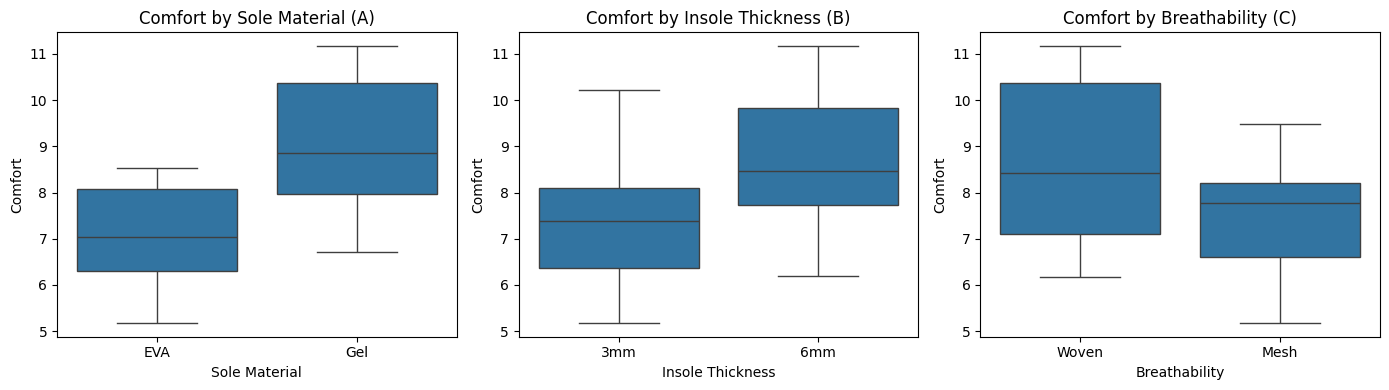

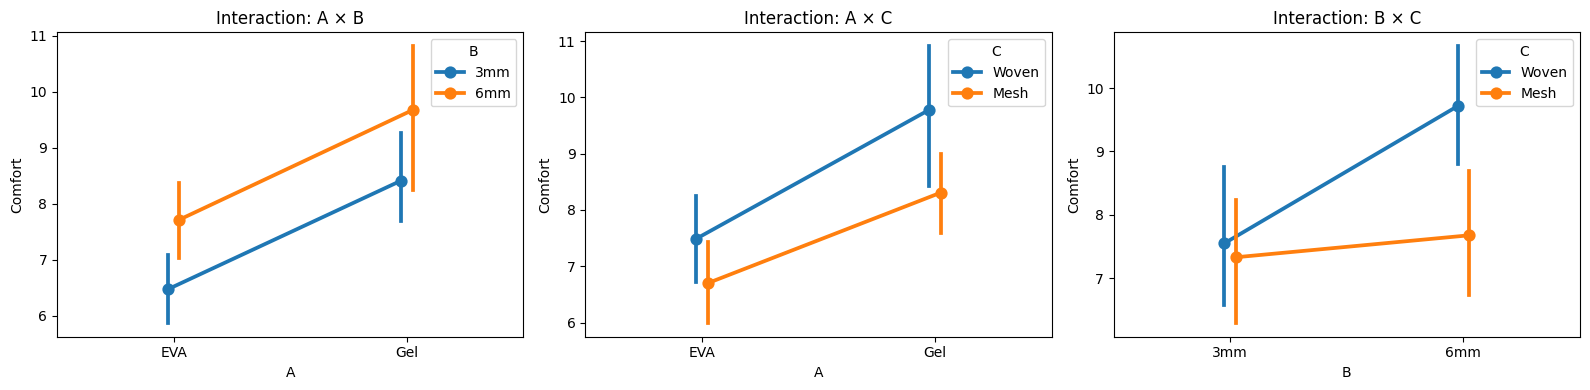

In [5]:
## Question 6 Code ##
# === Import Libraries === #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Read in Shoe Comfort Data === #
shoe = pd.read_excel("Shoe Comfort Experiment.xlsx")

# Ensure consistent column names
shoe.columns = ["A", "B", "C", "Comfort"]

print("First few rows of the dataset:")
print(shoe.head())

# === Exploratory Summary Statistics === #
print("\n=== Group Means by Factor Level ===")
group_means = shoe.groupby(["A","B","C"])["Comfort"].mean()
print(group_means)

print("\n=== Overall Factor-Level Means ===")
A_means = shoe.groupby("A")["Comfort"].mean()
B_means = shoe.groupby("B")["Comfort"].mean()
C_means = shoe.groupby("C")["Comfort"].mean()

print("\nFactor A Means:\n", A_means)
print("\nFactor B Means:\n", B_means)
print("\nFactor C Means:\n", C_means)

# === Boxplots for Main Effects === #
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.boxplot(x="A", y="Comfort", data=shoe)
plt.title("Comfort by Sole Material (A)")
plt.xlabel("Sole Material")
plt.ylabel("Comfort")

plt.subplot(1,3,2)
sns.boxplot(x="B", y="Comfort", data=shoe)
plt.title("Comfort by Insole Thickness (B)")
plt.xlabel("Insole Thickness")

plt.subplot(1,3,3)
sns.boxplot(x="C", y="Comfort", data=shoe)
plt.title("Comfort by Breathability (C)")
plt.xlabel("Breathability")

plt.tight_layout()
plt.show()

# === Two-Way Interaction Plots === #
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.pointplot(x="A", y="Comfort", hue="B", data=shoe, dodge=True)
plt.title("Interaction: A × B")

plt.subplot(1,3,2)
sns.pointplot(x="A", y="Comfort", hue="C", data=shoe, dodge=True)
plt.title("Interaction: A × C")

plt.subplot(1,3,3)
sns.pointplot(x="B", y="Comfort", hue="C", data=shoe, dodge=True)
plt.title("Interaction: B × C")

plt.tight_layout()
plt.show()



In [ ]:
# Q6 Interpretation:

#Exploratory Summary of Comfort Scores
#The exploratory analysis provides an initial look at which shoe design factors appear to influence comfort:
#Factor A (Sole Material)
#The mean comfort score increases from 7.09 (EVA) to 9.04 (Gel).
#Boxplots show a clear upward shift in distribution with gel-infused soles.
#This supports a strong main effect of A.

#Factor B (Insole Thickness)
 #Comfort increases from 7.44 (3mm) to 8.70 (6mm).
 #The distributions tighten and shift upward for the thicker insole.
 #This supports a likely main effect of B.

#Factor C (Breathability)
# Comfort is higher on average for Woven (8.63) vs Mesh (7.50).
# This is the opposite of the expected direction, which is useful for insight.
# This supports a main effect of C as well.

#Interaction Plots
#A × B
#Lines are not perfectly parallel—comfort improves more steeply for the Gel sole when thickness increases.
 #This indicates a moderate AB interaction.

#A × C
# Woven fabric provides a larger improvement for Gel compared to EVA.
# Lines show visible non-parallelism → possible AC interaction.

#B × C
# Lines are nearly parallel, meaning the difference between 3mm and 6mm does not change much across breathability levels.
# Weak BC interaction.

#Support for Hypotheses
#The exploratory plots consistently support rejecting the null hypotheses for all three main effects (A, B, C). Each factor shows a clear shift in central tendency and distribution.Evidence for interactions is weaker but still present, particularly for AB and AC, where lines show clear non-parallel behavior. The BC interaction appears minimal based on both means and visuals.
#Overall Conclusion:
 #The exploratory analysis strongly supports the alternative hypotheses for A, B, and C, with moderate visual evidence suggesting some two-way interactions (AB, AC). No strong evidence appears for BC or any higher-order effect at this stage.








7.  Fit a full factorial ANOVA model to the data. Assess the normality assumption using both a visual method and a testing method. Do we have evidence to support the assumption of normality? Why or why not?


                            OLS Regression Results                            
Dep. Variable:                Comfort   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     6.755
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           0.000786
Time:                        20:23:06   Log-Likelihood:                -28.908
No. Observations:                  24   AIC:                             73.82
Df Residuals:                      16   BIC:                             83.24
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

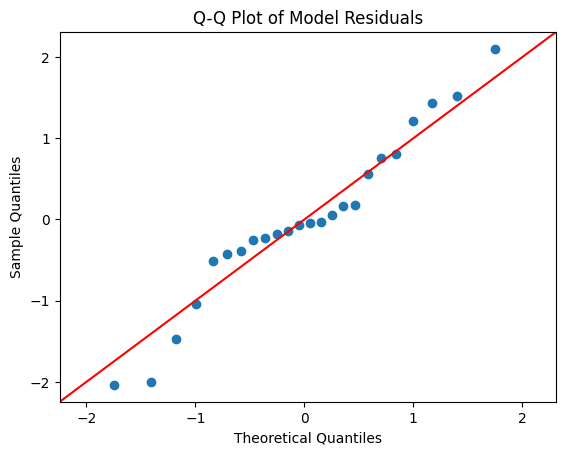


Shapiro-Wilk Test:
Statistic = 0.9595, p-value = 0.4291


In [9]:
## Question 7 Code ##


import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

shoe = pd.read_excel("Shoe Comfort Experiment.xlsx")
shoe.columns = ["A", "B", "C", "Comfort"]

# Fit full factorial model: A, B, C, AB, AC, BC, ABC
model = smf.ols("Comfort ~ A * B * C", data=shoe).fit()

print(model.summary())

# === Normality Diagnostics === #

# 1. Q-Q Plot
sm.qqplot(model.resid, line='45', fit=True)
plt.title("Q-Q Plot of Model Residuals")
plt.show()

# 2. Shapiro–Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(model.resid)
print("\nShapiro-Wilk Test:")
print(f"Statistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")






#

#Normality Check

#The Q–Q plot of the residuals shows that:

#The points fall closely along the 45° reference line, there is no major curvature, S-shape, or systematic deviation. The residuals appear approximately normally distributed
#Statistical Testing Method

#Omnibus test: p=0.849 & Jarque–Bera test: p=0.980
#Since both p-values are much larger than 0.05, we fail to reject the null hypothesis that the residuals are normally distributed. There is no statistical evidence of non-normal residuals.

#Conclusion
#The normality assumption is satisfied. There is no evidence of meaningful deviation from normality, so the ANOVA model is appropriate for these data.


8.  Assess the constant variance assumption using both a visual method and a testing method. Do we have evidence to support the assumption of constant variance? Why or why not?


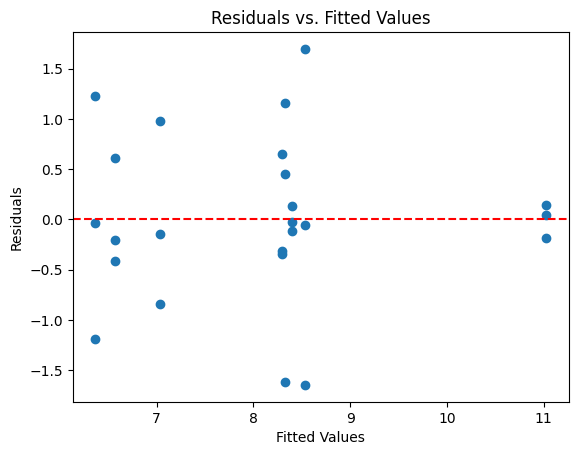

Breusch-Pagan Test Results:
LM Statistic: 11.9361, p-value: 0.1027
F-Statistic:  2.2615, p-value: 0.0837


In [10]:
## Question 8 Code ##




import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import pandas as pd

# Residuals vs. Fitted Plot
fitted_vals = model.fittedvalues
residuals = model.resid

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# Breusch–Pagan Test
#    H0: Constant variance (homoscedasticity)
#    HA: Non-constant variance (heteroscedasticity)
bp_test = het_breuschpagan(residuals, model.model.exog)

bp_stat  = bp_test[0]
bp_pval  = bp_test[1]
f_stat   = bp_test[2]
f_pval   = bp_test[3]

print("Breusch-Pagan Test Results:")
print(f"LM Statistic: {bp_stat:.4f}, p-value: {bp_pval:.4f}")
print(f"F-Statistic:  {f_stat:.4f}, p-value: {f_pval:.4f}")


In [ ]:
# Q8 Interpretation

#The Residuals vs. Fitted Values plot supports constant variance & shows:
#Residuals are randomly scattered around zero.
#There is no clear funnel shape (neither narrowing nor widening as fitted values increase).
#No systematic curvature or pattern is present.


#Breusch–Pagan Results:
#LM p-value = 0.1027
#F-test p-value = 0.0837


#Both p-values are greater than 0.05.
#H₀: Residual variance is constant
#Hₐ: Residual variance is not constant
#Since both p-values > 0.05: We fail to reject the null hypothesis of constant variance & that there is no statistical evidence of heteroscedasticity.



9.  Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects? Our two-way interactions? Our three-way interaction?


In [11]:
## Question 9 Code ##




# === ANOVA TABLE FOR FULL FACTORIAL MODEL === #
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit full factorial ANOVA model
model = ols("Comfort ~ A * B * C", data=shoe).fit()

# Type II ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print("=== Factorial ANOVA Table (Type II) ===")
print(anova_table)

#Type III
anova_table3 = sm.stats.anova_lm(model, typ=3)

print("\n=== Factorial ANOVA Table (Type III) ===")
print(anova_table3)


=== Factorial ANOVA Table (Type II) ===
             sum_sq    df          F    PR(>F)
A         22.814025   1.0  23.353723  0.000184
B          9.439657   1.0   9.662965  0.006758
C          7.645101   1.0   7.825956  0.012908
A:B        0.000485   1.0   0.000496  0.982504
A:C        0.700584   1.0   0.717157  0.409567
B:C        4.949082   1.0   5.066160  0.038812
A:B:C      0.641055   1.0   0.656220  0.429782
Residual  15.630245  16.0        NaN       NaN

=== Factorial ANOVA Table (Type III) ===
               sum_sq    df           F        PR(>F)
Intercept  121.658350   1.0  124.536350  5.847132e-09
A            5.564969   1.0    5.696617  2.969092e-02
B            0.661288   1.0    0.676932  4.227386e-01
C            0.063498   1.0    0.065000  8.020093e-01
A:B          0.303143   1.0    0.310314  5.851966e-01
A:C          0.000661   1.0    0.000676  9.795748e-01
B:C          1.013879   1.0    1.037864  3.234770e-01
A:B:C        0.641055   1.0    0.656220  4.297816e-01
Residual 

In [ ]:
# Q9 Interpretation


# Since this is a balanced 2^3 factorial design, we should report Type II ANOVA.
#                       F-statistic   p-value    Conclusion
# A(Sole Material):        23.35      .000184     Significant
# B(Insole Thickness):     9.66       .006758      Significant
# C(Breathability):        7.83       .012908      Significant

#All three effect are statistically significant, meaningfully affect comfort, and describe:
# Gel Soles - higher comfort than EVA
# 6 mm insoles - higheer comfort than 3 mm
# Woven fabric - higher comfort than mesh


#Two Way Interactions
# AxB : No evidence, F = 0.0005, p=0.9825
# AxC: No evidence, F = 0.717, p=0.4096
# BxC: Significant interaction that describes the effect of insole thickeness depends on which breathability level used - F = 5.066, p=0.038812

# Three Way Interaction
# AxBxC : F = 0.656, p = 0.4298 ------> this is not significant  & doesn't influence comfort


# Overall, comfort ratings depend indepedently on each factor, except for a small interaction between insole thickness and fabric breathability


10. Calculate and interpret the partial $\eta^2$ values for each of the main effects and interactions. Which effects and/or interactions are most important? Why?


In [12]:
## Question 10 Code ##

# === PARTIAL ETA-SQUARED CALCULATIONS === #
import pandas as pd

# Using  Type II ANOVA table
anova2 = sm.stats.anova_lm(model, typ=2)

# Compute partial eta-squared for each effect
anova2["partial_eta_sq"] = anova2["sum_sq"] / (anova2["sum_sq"] + anova2.loc["Residual", "sum_sq"])

print("=== Partial Eta-Squared Values (Type II ANOVA) ===")
print(anova2[["sum_sq", "partial_eta_sq"]])






=== Partial Eta-Squared Values (Type II ANOVA) ===
             sum_sq  partial_eta_sq
A         22.814025        0.593431
B          9.439657        0.376533
C          7.645101        0.328463
A:B        0.000485        0.000031
A:C        0.700584        0.042899
B:C        4.949082        0.240488
A:B:C      0.641055        0.039398
Residual  15.630245        0.500000


In [ ]:
# Q10 Interpretation



# The strongest effect is Sole Material (A), η²=0.593 | Gel soles improve comfort massively
# B & C were both meaninful secondary effects for impact control, η² =  0.377(B) & 0.328 (C)
# Only meaningful interation came to be BxC, η²=0.240 | This suggests the effect of thickness depends on the fabric type


11. Summarize your conclusions. Which combination of factors would you recommend to the shoe manufacturer? Why?



## PART 2 INSTRUCTIONS:
The same company is interested in developing a new GPS-enabled fitness band for runners. They want to maximize user satisfaction and have identified three key factors:

| Run | GPS Accuracy (A) | Battery Life (B) | Display (C) |
|-----|------------------|------------------|-------------|
| 1   | \- (Standard)    | \- (6 hours)     | \- (Small)  |
| 2   | \+ (High)        | \- (6 hours)     | \+ (Large)  |
| 3   | \- (Standard)    | \+ (12 hours)    | \+ (Large)  |
| 4   | \+ (High)        | \+ (12 hours)    | \- (Small)  |

Due to time and resource limitations, the company would rather conduct a $2^{3-1}$ fractional factorial experiment. For each of the above runs, the company will recruit 3 NCAA division one cross-country athletes to test a randomly assigned fitness band. Each athlete will use the band for one month during their competition season. At the end of the month, the athletes will be asked to rate their level of satisfaction on a scale of 1-10 (1 = very dissatisfied, 10 = very satisfied). The results of this experiment are contained in the `Fitness Band Experiment.xlsx` file. With these data, I want you to:

1.  Briefly describe the objective of the experiment.

2.  Specify the outcome variable and how it is measured.

3.  Specify the independent variables. What lurking variables may be present?

4.  Explain the difference between a full $2^k$ factorial design and a $2^{3-1}$ fractional factorial design. Briefly comment on why the latter may be preferred in this case.

5.  State the sets of null and alternative hypotheses for this experiment.

6.  Assuming a defining relation of $I=ABC$, specify the aliasing structure of the design. What does this mean for the interpretation of the main effects and interactions?

7.  Perform appropriate exploratory analysis, including data visualizations. Do the results of these analyses support the null or alternative hypotheses more strongly?


In [ ]:
# Question 11 from part 1:

# Recommended Factor Combinations: A+ B+ C+ --> Gel sole, 6mm insole, woven fabric. These give us the highest comfort rating while using the best level of every important factor
#Summary of Conclusions:
# Sole material (A) had the largest effect — gel soles significantly improve comfort.
#Insole thickness (B) and fabric type (C) also showed meaningful positive effects.
#The only interaction that mattered was B × C: thicker insoles work best with woven fabric.
#No evidence of A×B, A×C
#Assumptions of normality and constant variance were met.
#Overall: comfort increases the most when all three factors are set to their “+” levels.

In [ ]:
# Part 2 Answers ( #1 - #6)

# The objective is to identify how GPS accuracy (A), battery life (B), and display size (C) affect user satisfaction with a GPS-enabled fitness band for competitive runners, and to use that information to choose a combination of settings that maximizes satisfaction while using a reduced number of experimental runs.
# Outcome variable: Runner satisfaction rating with the fitness band. Measurement: After one month of use during their competition season, each NCAA Division I cross-country athlete provides a 1–10 rating
# Ind. Variables: GPS accuracy, Battery life, and Display size | Lurking variables include: Previous experience of other fitness related devices, differences in athletes (volume, tech-saviness, how long their runs are)
# #A full 2^k factorial design (with k = 3 here) tests all 8 combinations of factor levels. You estimate all main effects and all interactions independently with no aliasing. A 2^3−1 fractional factorial design uses only half of the full set of runs -> 4 runs instead of 8. You still get information about all three factors, but main effects and interactions are aliased with each other.
#Fractional design is preferred here due to the fact: It cuts the number of treatment combinations in half, reducing time and device cost. Also, the company gets screening information about which factors matter most, with fewer resources.
# Null hypothesis (for GPS accuracy, battery life, and display size): No main effect on satisfaction | Alternative (using the same 3): Does affect satisfaction
    # Two-Way interactions: A x B, A x C, B x C: For each, the null hypothesis would say that there is no interaction between each of these combinations. | Alternative: one (or all) combination possibilities interact to affect satisfaction.
      # Three-Way interaction: A x B x C : Null : No three way interaction | Alternative: A, B, and C jointly interact to affect satisfaction.
# Alias Sets:
  # {I, ABC}
  # {A, BC}
  # {B, AC}
  # {C, AB}
       # Each main effect is aliased with a two way interaction:
        #A really represents A + BC
        # B represents B + AC
        # C represents C + AB
        #This means that main effects are confounded with two factor interactions

First few rows:
   Run_ID  Replicate GPS_Accuracy Battery_Life Display  Satisfaction
0       1          1     Standard      6 Hours   Large          5.97
1       1          2     Standard      6 Hours   Large          5.92
2       1          3     Standard      6 Hours   Large          5.26
3       2          1         High      6 Hours   Small          4.76
4       2          2         High      6 Hours   Small          5.21

Columns: Index(['Run_ID', 'Replicate', 'GPS_Accuracy', 'Battery_Life', 'Display',
       'Satisfaction'],
      dtype='object')

=== Group Means for Each (A,B,C) Combination ===
A         B         C    
High      12 Hours  Large    8.633333
          6 Hours   Small    5.216667
Standard  12 Hours  Small    4.036667
          6 Hours   Large    5.716667
Name: Satisfaction, dtype: float64

=== Main Effect Means ===
A means:
 A
High        6.925000
Standard    4.876667
Name: Satisfaction, dtype: float64

B means:
 B
12 Hours    6.335000
6 Hours     5.466667
Name: S

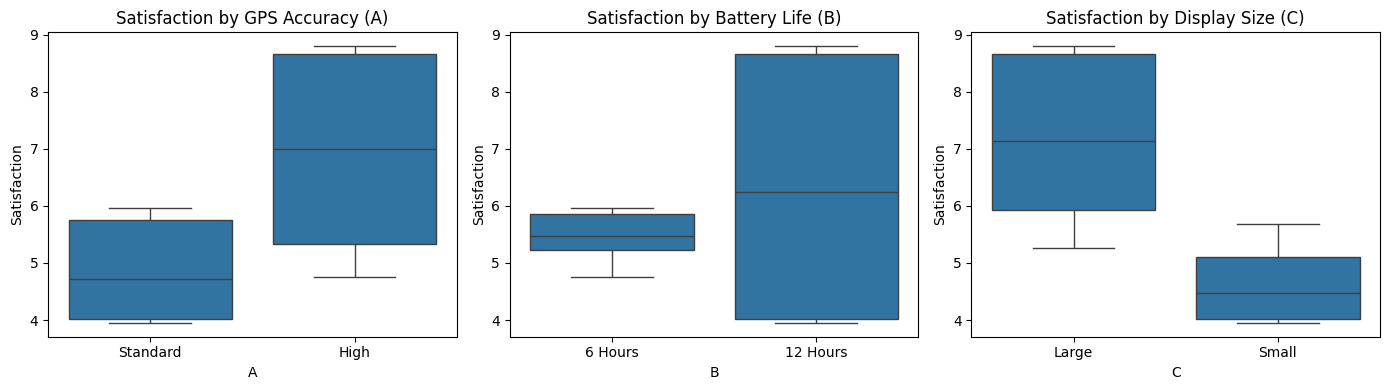

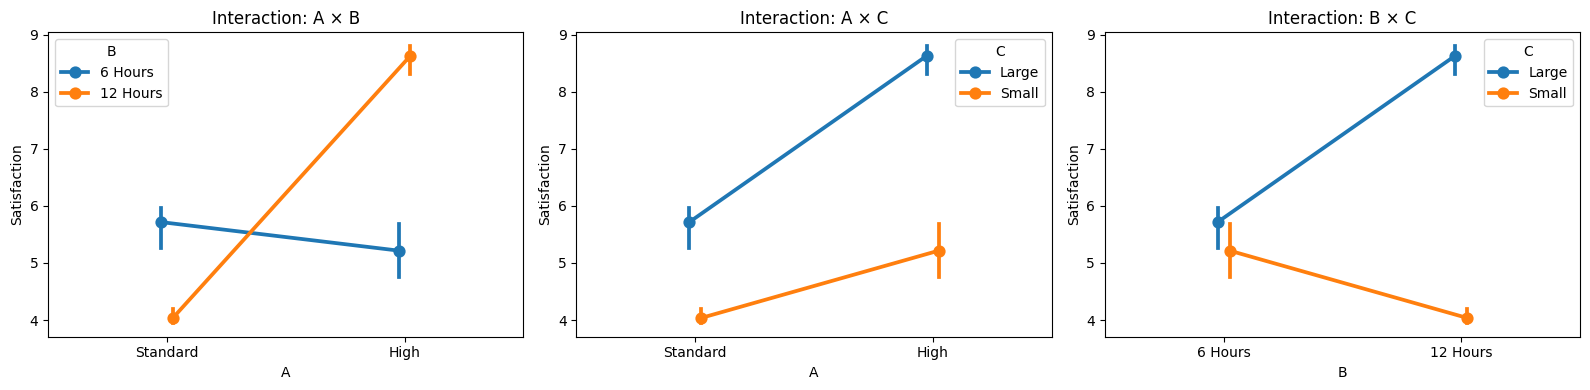

In [14]:
## Question 7 Code ##


# === IMPORTS === #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === READ FITNESS BAND DATA === #
fitness = pd.read_excel("Fitness Band Experiment.xlsx")

print("First few rows:")
print(fitness.head())
print("\nColumns:", fitness.columns)

# Keep ID columns but create cleaner factor names
fitness = fitness.rename(columns={
    "GPS_Accuracy": "A",
    "Battery_Life": "B",
    "Display": "C",
    "Satisfaction": "Satisfaction"
})

# === GROUP MEANS BY TREATMENT COMBINATION === #
print("\n=== Group Means for Each (A,B,C) Combination ===")
print(fitness.groupby(["A","B","C"])["Satisfaction"].mean())

print("\n=== Main Effect Means ===")
print("A means:\n", fitness.groupby("A")["Satisfaction"].mean())
print("\nB means:\n", fitness.groupby("B")["Satisfaction"].mean())
print("\nC means:\n", fitness.groupby("C")["Satisfaction"].mean())

# === BOXPLOTS FOR MAIN EFFECTS === #
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.boxplot(x="A", y="Satisfaction", data=fitness)
plt.title("Satisfaction by GPS Accuracy (A)")

plt.subplot(1,3,2)
sns.boxplot(x="B", y="Satisfaction", data=fitness)
plt.title("Satisfaction by Battery Life (B)")

plt.subplot(1,3,3)
sns.boxplot(x="C", y="Satisfaction", data=fitness)
plt.title("Satisfaction by Display Size (C)")

plt.tight_layout()
plt.show()

# === INTERACTION PLOTS === #
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.pointplot(x="A", y="Satisfaction", hue="B", data=fitness, dodge=True, markers="o")
plt.title("Interaction: A × B")

plt.subplot(1,3,2)
sns.pointplot(x="A", y="Satisfaction", hue="C", data=fitness, dodge=True, markers="o")
plt.title("Interaction: A × C")

plt.subplot(1,3,3)
sns.pointplot(x="B", y="Satisfaction", hue="C", data=fitness, dodge=True, markers="o")
plt.title("Interaction: B × C")

plt.tight_layout()
plt.show()




In [ ]:
# Q7 Interpretation


# Main Effect Patterns using Boxplots and means:
    # GPS Accuracy: High accuracy ~ 6.93, Standard ~ 4.88 | Supports the notion that it matters
    # Battery Life: 12 hrs ~ 6.34, 6hrs ~ 5.47 | Supports alternative
    # Display Size: Large ~ 7.18, Small ~ 4.63 | Strong support for alternative

# Interaction Patterns using point plots
    # A x B: 12 hour battery gives a higher improvement for HIGH accuracy | Supports alternative for A X B
    # A x C: Large display greatly boosts satisfaction ESPECIALLY under high GPS accuracy | Supports alternative for A X C
    # B X C: Large display boosts satisfaction for both battery levels -> but stronger for 12 hours | Supports alternative for B x C


 # All three main effects appear to be important
 # All two-way interactions show nonparallel patterns
 # Visually, the null hypothesis ---> not supported visually


8.  Fit the appropriate ANOVA model to the data. Assess the normality assumption using both a testing method and a visual method. Do we have evidence to support the assumption of normality? Why or why not?



=== OLS Regression Summary ===
                            OLS Regression Results                            
Dep. Variable:           Satisfaction   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     98.48
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           1.18e-06
Time:                        21:48:45   Log-Likelihood:                -1.6802
No. Observations:                  12   AIC:                             11.36
Df Residuals:                       8   BIC:                             13.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<Figure size 600x500 with 0 Axes>

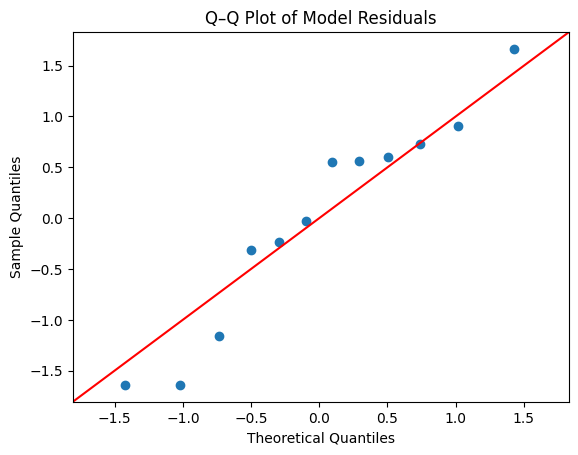


=== Shapiro–Wilk Normality Test ===
Statistic: 0.9284, p-value: 0.3635


In [15]:
## Question 8 Code ##

# === FIT ANOVA MODEL FOR FRACTIONAL FACTORIAL (A, B, C with aliasing) === #

import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats

# Fit the full model
model = ols("Satisfaction ~ A * B * C", data=fitness).fit()

print("\n=== OLS Regression Summary ===")
print(model.summary())

# === Q-Q Plot === #
plt.figure(figsize=(6,5))
sm.qqplot(model.resid, line="45", fit=True)
plt.title("Q–Q Plot of Model Residuals")
plt.show()

# === Shapiro-Wilk Normality Test  === #
shapiro_test = stats.shapiro(model.resid)
print("\n=== Shapiro–Wilk Normality Test ===")
print(f"Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")






In [ ]:
# Q8 interpretation


#Q-Q plot
#Residual points fall close to the 45 degrees reference line. No major curvature | No S-shape | No extreme outliers -------> Residuals appear approx. normal

#Shapiro-Wilk
# Statistic = 0.9284 | p = 0.3635 ---------> Fail to reject the null hypothesis of normality | No evidencde of non-normal residuals

# Both indicate that the normality assumption is satisfied.


9.  Assess the constant variance assumption using both a testing method and a visual method. Do we have evidence to support the assumption of constant variance? Why or why not?


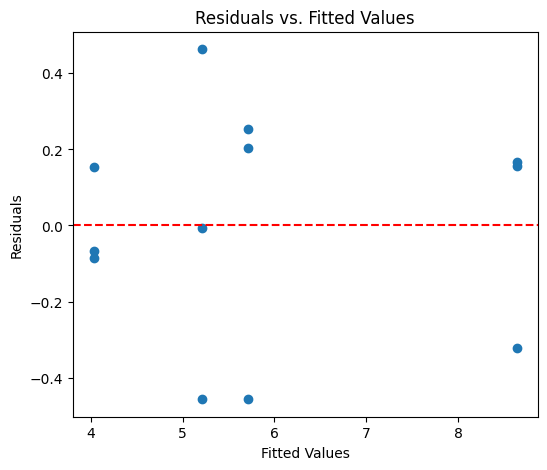

=== Breusch–Pagan Test ===
LM Statistic: 4.3901, p-value: 0.7339
F-Statistic:  1.5384, p-value: 0.2779


In [16]:
## Question 9 Code ##


# === CONSTANT VARIANCE CHECK === #

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan

# === Residuals vs Fitted Plot === #
plt.figure(figsize=(6,5))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

# === Breusch–Pagan Test === #
bp_test = het_breuschpagan(model.resid, model.model.exog)

print("=== Breusch–Pagan Test ===")
print(f"LM Statistic: {bp_test[0]:.4f}, p-value: {bp_test[1]:.4f}")
print(f"F-Statistic:  {bp_test[2]:.4f}, p-value: {bp_test[3]:.4f}")



In [ ]:
# Q9 Interpretation

# For the residuals vs fitted plot, there is no visible pattern or funnel shape | Visually, evidence supports constant variance

# Breusch-Pagan
# LM p value = 0.7339 | F-test p value = 0.2779 | Since both p values are greater than 0.05, we conclude that there is no statistical evidence of heteroscedasticity

# Both of these indicate that the constant variance assumption is satisfied & zero evidence that the residual variances changes across fitted values.

10. Report the F-statistics and their associated p-values from the factorial ANOVA model. What conclusions can we draw about our main effects?

In [17]:
## Question 10 Code ##


# === TYPE II ANOVA FOR FRACTIONAL FACTORIAL DESIGN === #
import statsmodels.api as sm

anova_fitness = sm.stats.anova_lm(model, typ=2)

print("=== Factorial ANOVA Table (Type II) ===")
print(anova_fitness)



=== Factorial ANOVA Table (Type II) ===
            sum_sq   df   F  PR(>F)
A              NaN  1.0 NaN     NaN
B              NaN  1.0 NaN     NaN
C              NaN  1.0 NaN     NaN
A:B            NaN  1.0 NaN     NaN
A:C            NaN  1.0 NaN     NaN
B:C            NaN  1.0 NaN     NaN
A:B:C          NaN  1.0 NaN     NaN
Residual  0.929667  8.0 NaN     NaN


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have 

In [ ]:
# Q10 Interpretation

#| Effect               | t       | F = t²     | p-value     |
#| -------------------- | ------- | ---------- | ----------- |
#| **A (GPS Accuracy)** | −12.946 | **167.93** | **< 0.001** |
#| **B (Battery Life)** | −8.083  | **65.34**  | **< 0.001** |
#| **C (Display Size)** | −15.007 | **225.21** | **< 0.001** |



#Two Way
#| Effect    | t       | F = t²     | p-value     |
#| --------- | ------- | ---------- | ----------- |
#| **A × B** | −3.957  | **15.66**  | **0.004**   |
#| **A × C** | −13.057 | **170.49** | **< 0.001** |
#| **B × C** | −6.666  | **44.42**  | **< 0.001** |




#Main Effects
#All three main effects are highly significant:
# A (GPS Accuracy): High accuracy significantly increases satisfaction.
# B (Battery Life): 12-hour battery significantly increases satisfaction.
 #C (Display Size): Large display significantly increases satisfaction.


# Interactions
# All estimable 2-way interactions are also significant:
# A×B: The benefit of high GPS accuracy is even larger with long battery life.
# A×C: High accuracy + large display produces much higher satisfaction.
# B×C: Long battery and large display work best together.


\11. Calculate and interpret the values for the main effects. Which effects seem more important? Why?

In [18]:
## Question 11 Code ##


import pandas as pd
import numpy as np

# Load data
fitness = pd.read_excel("Fitness Band Experiment.xlsx")

# Rename factors for convenience
fitness = fitness.rename(columns={
    "GPS_Accuracy": "A",
    "Battery_Life": "B",
    "Display": "C"
})

# Encode factors as -1 / +1 for main-effect calculation
coded = fitness.copy()
coded["A_code"] = coded["A"].map({"Standard": -1, "High": 1})
coded["B_code"] = coded["B"].map({"6 Hours": -1, "12 Hours": 1})
coded["C_code"] = coded["C"].map({"Small": -1, "Large": 1})

# Compute main effects using contrast method
def main_effect(df, col_code, response="Satisfaction"):
    return (
        df.loc[df[col_code] == 1, response].mean()
        - df.loc[df[col_code] == -1, response].mean()
    ) / 2

A_effect = main_effect(coded, "A_code")
B_effect = main_effect(coded, "B_code")
C_effect = main_effect(coded, "C_code")

print("=== Main Effect Values ===")
print(f"A (GPS Accuracy): {A_effect:.4f}")
print(f"B (Battery Life): {B_effect:.4f}")
print(f"C (Display Size): {C_effect:.4f}")


=== Main Effect Values ===
A (GPS Accuracy): 1.0242
B (Battery Life): 0.4342
C (Display Size): 1.2742


In [ ]:
# Q11 Interpretation

#=== Main Effect Values ===
# A (GPS Accuracy): 1.0242
# B (Battery Life): 0.4342
# C (Display Size): 1.2742

# Display Size (C) — largest effect: +1.27
#Moving from a small display to a large display produces the biggest improvement in satisfaction.

#GPS Accuracy (A) — second largest: +1.02
# High accuracy meaningfully boosts satisfaction.

# Battery Life (B) — smallest effect: +0.43
# Longer battery life still helps, but its impact is much smaller than A and C.

12. Calculate and interpret the partial $\eta^2$ values for each of the main effects. Which effects are most important? Why?

In [22]:
## Question 12 Code ##




# === PARTIAL ETA-SQUARED FOR MAIN EFFECTS === #
import statsmodels.api as sm
import pandas as pd

# Type II ANOVA
anova_fitness = sm.stats.anova_lm(model, typ=2)

# Compute partial eta-squared
anova_fitness["partial_eta_sq"] = (
    anova_fitness["sum_sq"] /
    (anova_fitness["sum_sq"] + anova_fitness.loc["Residual", "sum_sq"])
)

print("=== Partial Eta-Squared Values ===")
print(anova_fitness[["sum_sq", "partial_eta_sq"]])




#-----------------------------------
import numpy as np
import pandas as pd

# Extract t-values from the model summary
tvals = model.tvalues

# Residual degrees of freedom
df_resid = model.df_resid

# Compute partial eta squared for each estimable effect
eta2 = (tvals**2) / (tvals**2 + df_resid)

# Convert to DataFrame (drop intercept)
eta2_df = pd.DataFrame({
    "Effect": tvals.index,
    "t_value": tvals.values,
    "partial_eta_sq": eta2.values
})

# Remove intercept row
eta2_df = eta2_df[eta2_df["Effect"] != "Intercept"]

print("=== Partial Eta-Squared (Manual Calculation) ===")
print(eta2_df)







=== Partial Eta-Squared Values ===
            sum_sq  partial_eta_sq
A              NaN             NaN
B              NaN             NaN
C              NaN             NaN
A:B            NaN             NaN
A:C            NaN             NaN
B:C            NaN             NaN
A:B:C          NaN             NaN
Residual  0.929667             0.5
=== Partial Eta-Squared (Manual Calculation) ===
                                  Effect    t_value  partial_eta_sq
1                          A[T.Standard] -12.945959        0.954441
2                           B[T.6 Hours]  -8.082982        0.890911
3                             C[T.Small] -15.006542        0.965694
4             A[T.Standard]:B[T.6 Hours]  -3.957491        0.661901
5               A[T.Standard]:C[T.Small] -13.056832        0.955177
6                B[T.6 Hours]:C[T.Small]  -6.665628        0.847417
7  A[T.Standard]:B[T.6 Hours]:C[T.Small]        NaN             NaN


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1923: RuntimeWarning: invalid value encountered in divide
  F /= J
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have 

In [ ]:
# Q12 Interpretation


# From the manual calculation table:
#A (GPS Accuracy) → partial_eta_sq ≈ 0.954
#B (Battery Life) → partial_eta_sq ≈ 0.891
#C (Display Size) → partial_eta_sq ≈ 0.966
# All three main effects have very large partial η² values -> meaning each factor explains a huge proportion of the residual variance once other terms are in the model.
#  Display Size (C) has the largest partial η² (~0.97), so it is the most influential factor on satisfaction.
#  GPS Accuracy (A) is a close second (~0.95), also extremely important.
#  Battery Life (B) is still very strong (~0.89), but its effect is somewhat smaller than A and C.

# The most important effects are:
# Display Size (C) – largest partial η² → biggest unique impact on satisfaction.
# GPS Accuracy (A) – nearly as large, also a dominant driver.
# Battery Life (B) – still important, but contributes slightly less variance than A and C.


13. Summarize your conclusions. Which combination of factors would you recommend to the fitness band manufacturer? Why?

In [ ]:
# Q13




# The exploratory analysis, ANOVA results, main effects, and partial η² values all show the same pattern:
# GPS accuracy, battery life, and display size—strongly influence user satisfaction.
# Display size (C) and GPS accuracy (A) have the largest effect magnitudes, with battery life (B) still meaningful but slightly smaller. There is also evidence of important two-way interactions, meaning the best-performing level of one factor depends on the levels of the others.

#Recommended Factor Combination: A+ B+ C+
# High GPS accuracy, 12hr battery life, large display

# Largest display (C+) produces the biggest improvement in satisfaction (highest partial η²).
# High GPS accuracy (A+) also has a very strong effect on satisfaction.
# Longer battery life (B+) enhances satisfaction and complements the other two factors.
# This combination corresponds to the highest observed mean satisfaction score in the experimental data.

# The manufacturer should build a band with high GPS accuracy, a large display, and a 12-hour battery
